Segmentaion

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,MeanShift, DBSCAN, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from  sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score,davies_bouldin_score,silhouette_score

Data Loading

In [38]:
df = pd.read_csv('data.csv', encoding='latin1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [39]:
df.isnull().sum()




InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [40]:
df.dropna(inplace=True)
df.reset_index(inplace = True, drop = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [41]:
df1=df.copy()
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','CustomerID','Country']

for category in categories:
    
        df1[category] = le.fit_transform(df1[category].astype(str))
        
        
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3249,3716,6,6070,2.55,4048,35
1,0,2649,3724,6,6070,3.39,4048,35
2,0,2855,861,8,6070,2.75,4048,35
3,0,2803,1813,6,6070,3.39,4048,35
4,0,2802,2776,6,6070,3.39,4048,35
...,...,...,...,...,...,...,...,...
406824,18535,1470,2263,12,8338,0.85,275,13
406825,18535,1746,695,6,8338,2.10,275,13
406826,18535,2086,701,4,8338,4.15,275,13
406827,18535,2087,700,4,8338,4.15,275,13


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  int32  
 1   StockCode    406829 non-null  int32  
 2   Description  406829 non-null  int32  
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  int32  
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  int32  
 7   Country      406829 non-null  int32  
dtypes: float64(1), int32(6), int64(1)
memory usage: 15.5 MB


In [43]:
df1.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,9950.901755,1573.257501,2024.692726,12.061303,9873.635245,3.460471,2176.377102,32.827731
std,5552.295845,844.054584,1089.177346,248.693370,6061.121177,69.315162,1255.543861,6.738565
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,0.000000,0.000000,0.000000
25%,5060.000000,937.000000,1143.000000,2.000000,4434.000000,1.250000,1196.000000,35.000000
50%,10310.000000,1522.000000,1987.000000,5.000000,9518.000000,1.950000,2073.000000,35.000000
75%,14651.000000,2106.000000,2945.000000,12.000000,15303.000000,3.750000,3287.000000,35.000000
max,22189.000000,3683.000000,3895.000000,80995.000000,20459.000000,38970.000000,4371.000000,36.000000


Data Cleaning and Preprocessing

In [44]:
df1.drop(axis=1,columns='InvoiceDate',inplace=True)
wrong_data = df1[df1['Quantity']<0].index
wrong_data
df1.drop(index=wrong_data,axis=0,inplace=True)
df1.reset_index(drop=True,inplace=True)
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,0,3249,3716,6,2.55,4048,35
1,0,2649,3724,6,3.39,4048,35
2,0,2855,861,8,2.75,4048,35
3,0,2803,1813,6,3.39,4048,35
4,0,2802,2776,6,3.39,4048,35
...,...,...,...,...,...,...,...
397919,18535,1470,2263,12,0.85,275,13
397920,18535,1746,695,6,2.10,275,13
397921,18535,2086,701,4,4.15,275,13
397922,18535,2087,700,4,4.15,275,13


In [45]:
scaler = MinMaxScaler(feature_range=(1,5))
normalized_array = scaler.fit_transform(df1)
normalized_df = pd.DataFrame(normalized_array,columns=df1.columns)
normalized_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,1.0,4.528645,4.816175,1.000247,1.001253,4.704415,4.888889
1,1.0,3.877002,4.824390,1.000247,1.001665,4.704415,4.888889
2,1.0,4.100733,1.884211,1.000346,1.001351,4.704415,4.888889
3,1.0,4.044257,2.861874,1.000247,1.001665,4.704415,4.888889
4,1.0,4.043171,3.850834,1.000247,1.001665,4.704415,4.888889
...,...,...,...,...,...,...,...
397919,5.0,2.596525,3.324005,1.000543,1.000418,1.251659,2.444444
397920,5.0,2.896280,1.713736,1.000247,1.001032,1.251659,2.444444
397921,5.0,3.265544,1.719897,1.000148,1.002039,1.251659,2.444444
397922,5.0,3.266630,1.718870,1.000148,1.002039,1.251659,2.444444


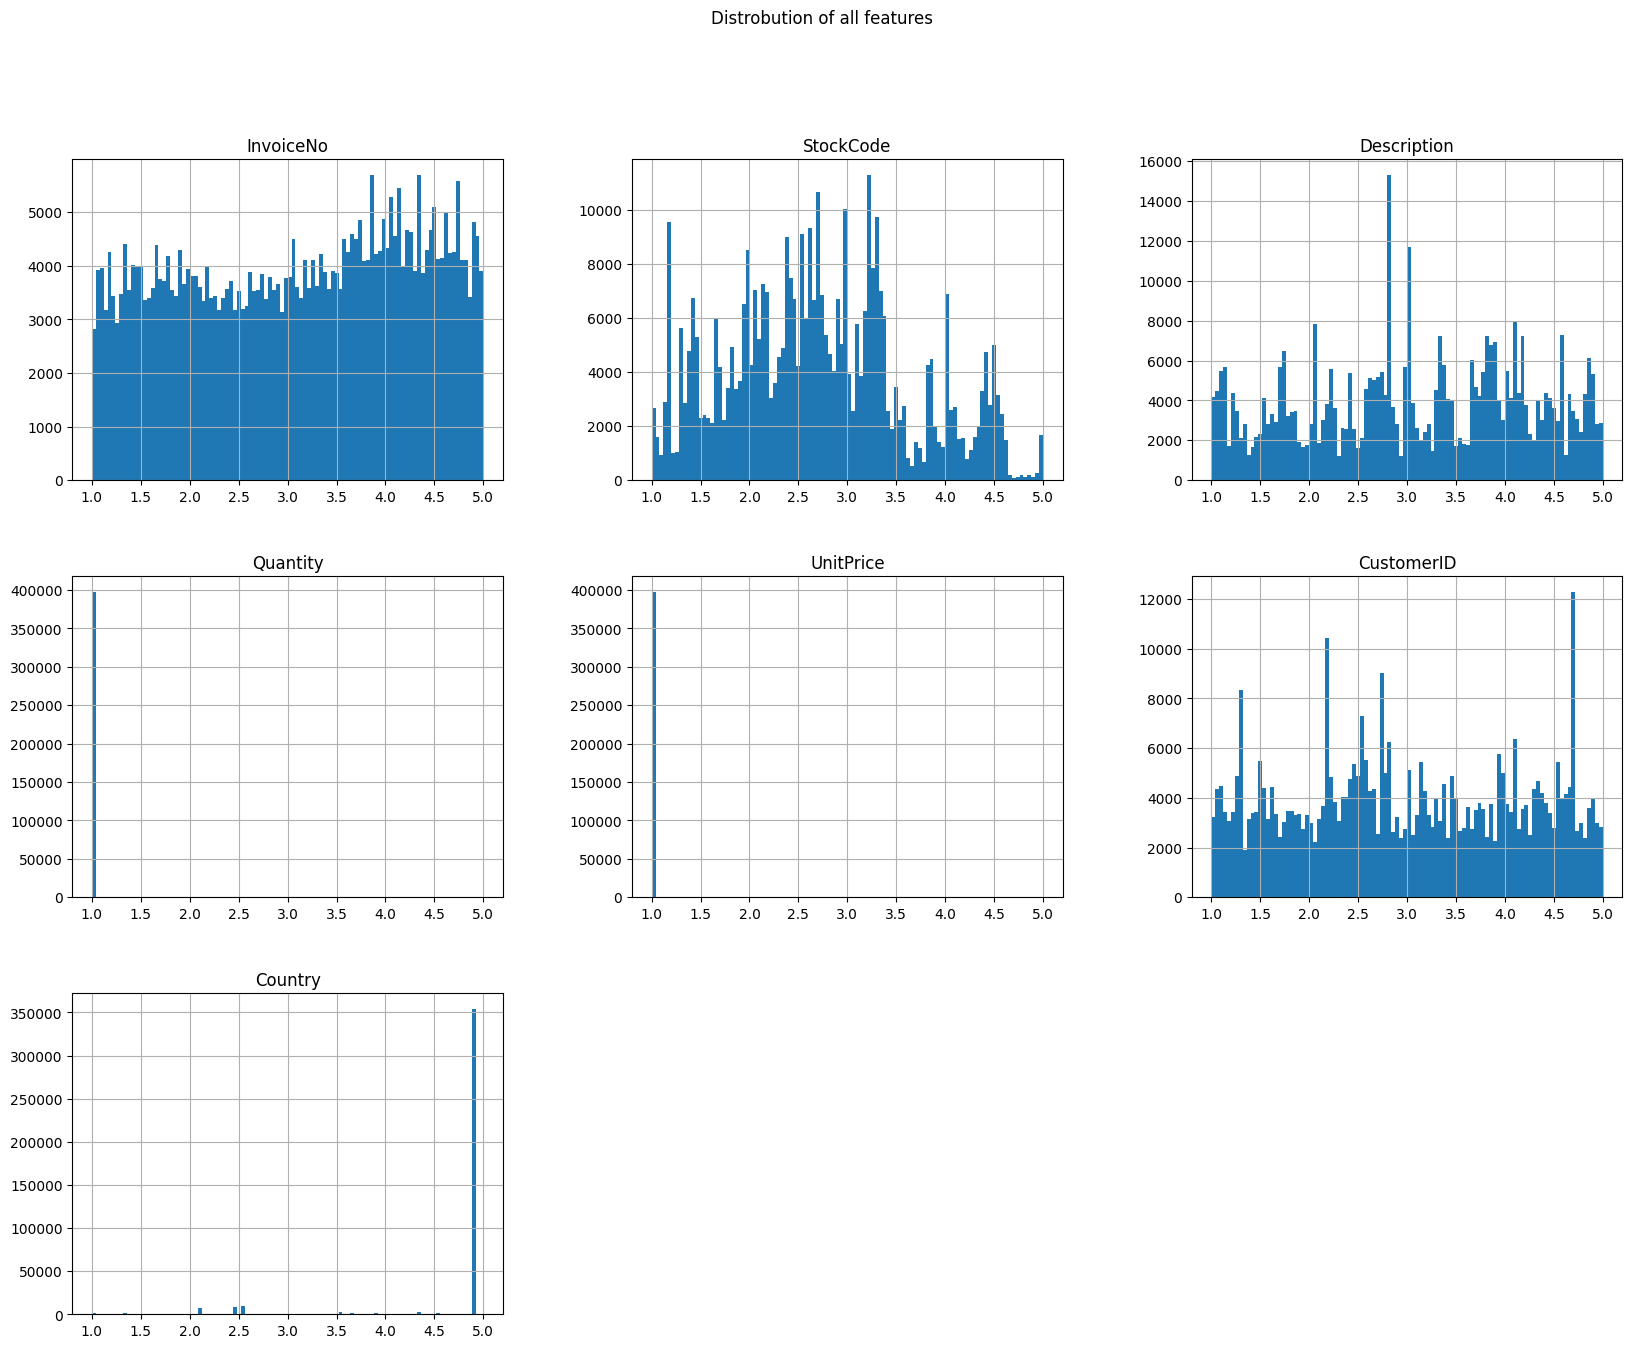

In [46]:
normalized_df.hist(bins=100,figsize=(20,15))
plt.suptitle('Distrobution of all features')
plt.show()

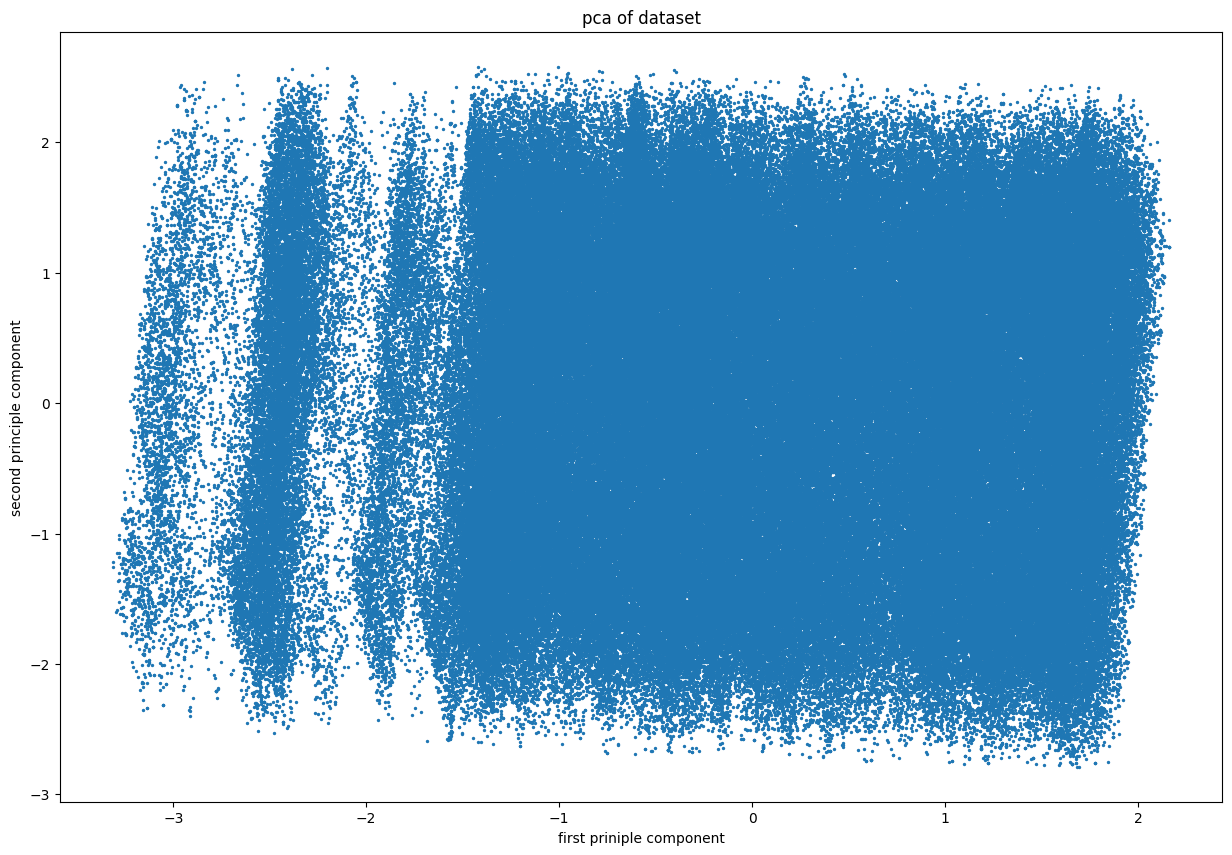

In [47]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_df)

plt.figure(figsize=(15,10))
plt.scatter(pca_result[:,0],pca_result[:,1],s = 2)
plt.title('pca of dataset')
plt.xlabel('first priniple component')
plt.ylabel('second principle component')
plt.show()

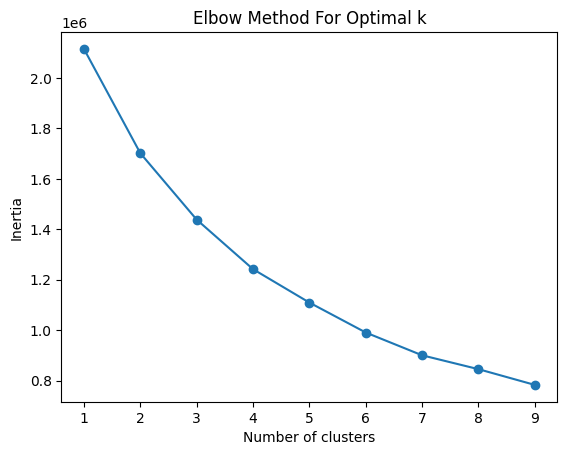

In [48]:
inertia = []
K = range(1, 10)
for k in K:
        kmeans1 = KMeans(n_clusters=k, random_state=0)
        kmeans1.fit(normalized_df)
        inertia.append(kmeans1.inertia_)
   
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [49]:
km = KMeans(n_clusters=5,random_state=0)
km.fit(normalized_df)
labels = km.predict(normalized_df)

In [50]:

df1['Cluster'] = labels


In [51]:
for i in range(2,6) :

    pca = PCA(n_components=i,random_state=0)
    pca_result = pca.fit_transform(normalized_df)
    explained_variance = pca.explained_variance_ratio_
    print(f'{i} component cover {np.sum(explained_variance)}')

2 component cover 0.5301845183517297
3 component cover 0.7642705659071389
4 component cover 0.9188520054518354
5 component cover 0.9999629370753996


the explained variance result : [0.27186735 0.25831717 0.23408605 0.15458144]


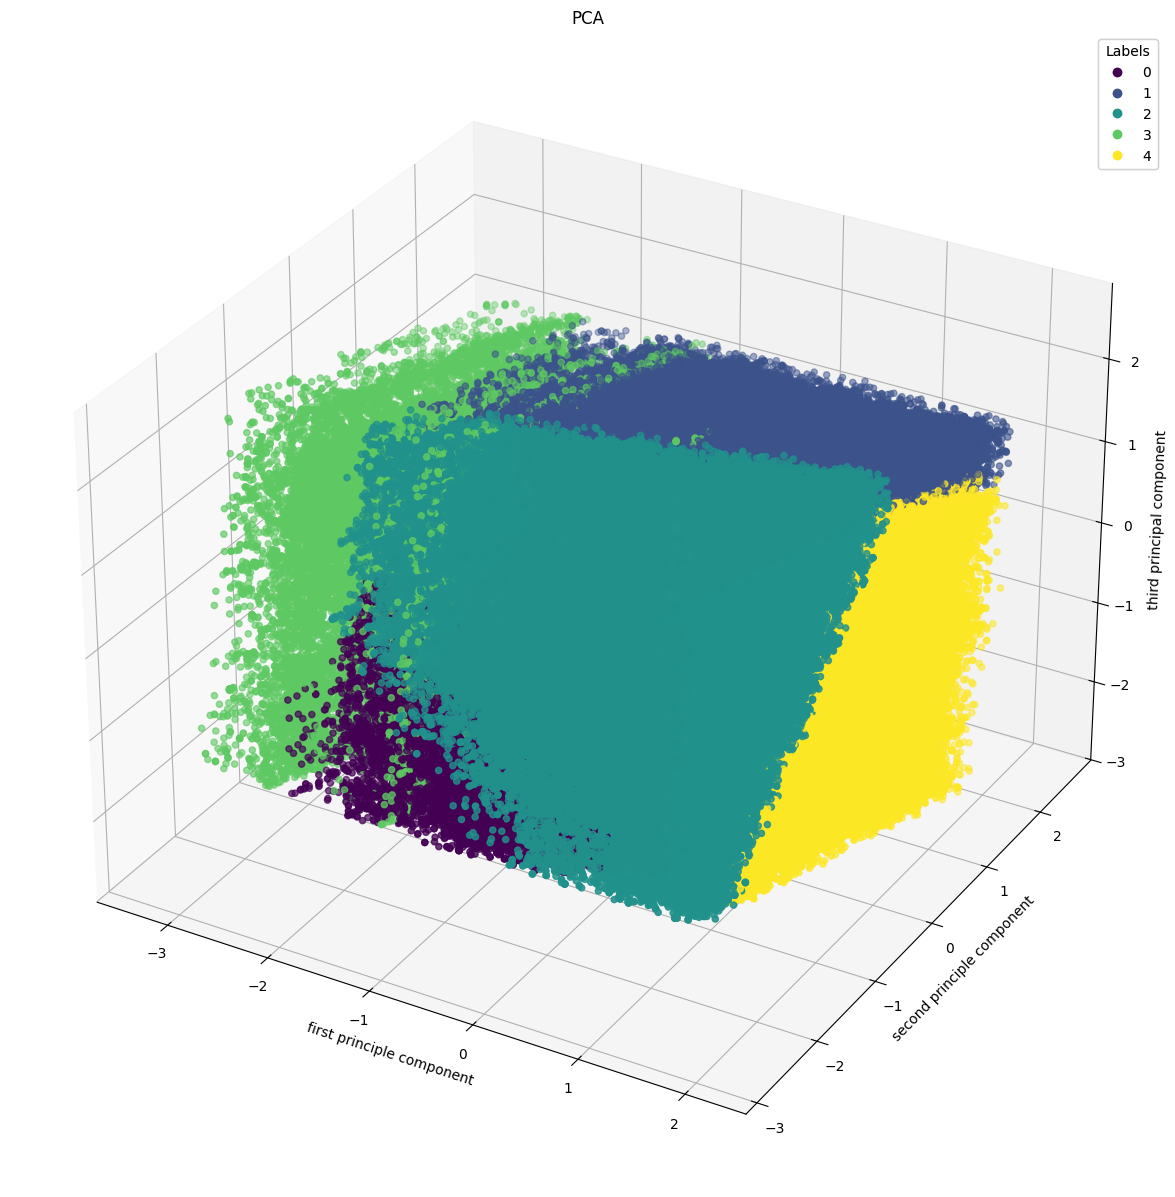

C:\Users\Zeyad Elsawi\AppData\Local\Temp\ipykernel_24192\873488931.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


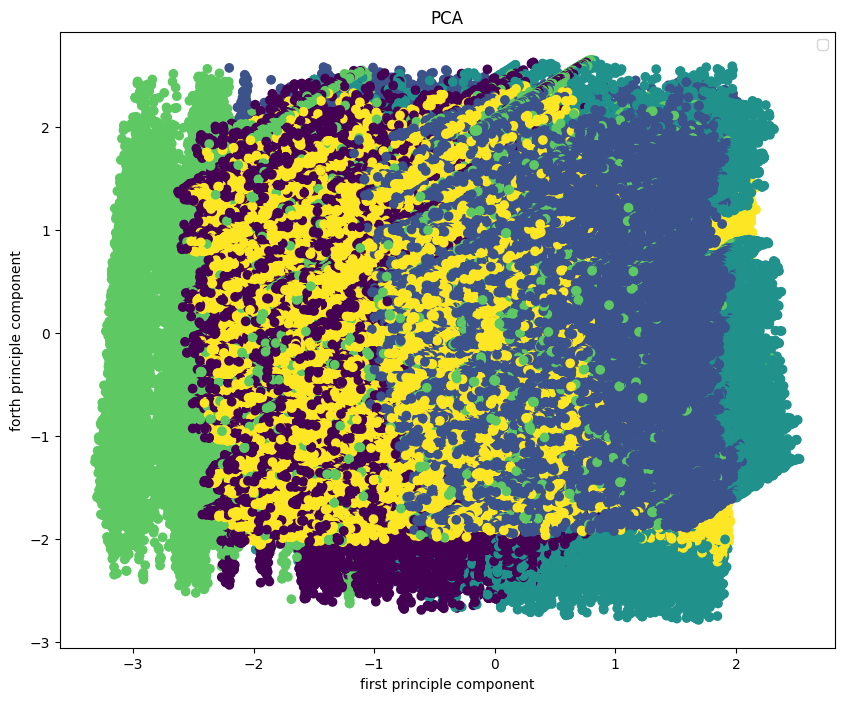

In [52]:
pca = PCA(n_components=4,random_state=0)
pca_result = pca.fit_transform(normalized_df)
print(f'the explained variance result : {pca.explained_variance_ratio_}')
plt.figure(figsize=(25,15))
ax = plt.axes(projection = '3d')

scatter = ax.scatter3D(pca_result[:,0],pca_result[:,1],pca_result[:,2],c=labels)
plt.xlabel('first principle component')
plt.ylabel('second principle component')
ax.set_zlabel('third principal component')
plt.title('PCA')
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,1],c=labels)
plt.scatter(pca_result[:,2],pca_result[:,3],c=labels)

plt.legend()
plt.xlabel('first principle component')
plt.ylabel('forth principle component')
plt.title('PCA')
plt.show()

In [53]:
counts = df1.Cluster.value_counts()

# Fraction of each cluster
fractions = counts / len(df1)

print(counts)     # raw counts
print(fractions)  # fractions (0–1)
print(fractions * 100)  # percentages

Cluster
2    103588
1     93070
0     85090
4     82028
3     34148
Name: count, dtype: int64
Cluster
2    0.260321
1    0.233889
0    0.213835
4    0.206140
3    0.085815
Name: count, dtype: float64
Cluster
2    26.032107
1    23.388888
0    21.383480
4    20.613987
3     8.581538
Name: count, dtype: float64
